# 라이브러리

In [4]:
import time
from selenium import webdriver
import re
from bs4 import BeautifulSoup
import unicodedata
import pandas as pd # 저장할때

# 자동 크롤링

In [5]:
# 자동 크롤링
driver = webdriver.Chrome("./chromedriver.exe")
time.sleep(1)

driver.get('https://www.naver.com/')
time.sleep(2)

search = '코로나현황'   
# input_id = driver.find_elements_by_css_selector('input_text')
# input_id.clear()
element = driver.find_element_by_name('query')
element.send_keys(search)
element.submit()
time.sleep(2)

#클릭하기
def select_first(driver):
    first = driver.find_elements_by_css_selector('#_cs_production_type > div > div:nth-child(4) > div > div.info_top > div > div > div > ul > li:nth-child(1) > a > span')[0]
    first.click()
    time.sleep(2)
    
select_first(driver)

# 현재 페이지 html 정보 가져오기

'<html lang="ko" data-useragent="mozilla/5.0 (windows nt 10.0; win64; x64) applewebkit/537.36 (khtml, like gecko) chrome/92.0.4515.159 safari/537.36" data-platform="win32"><head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="코로나현황 : 네이버 통합검색"> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'코로나현황\'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="\'코로나현황\'의 네이버 통합검색 결과입니다."> <title>코로나현황 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver"><link rel="s
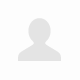
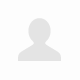
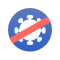
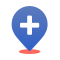
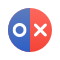
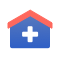

In [10]:
#현재 페이지 html 정보 가져오기
html = driver.page_source
html

In [6]:
soup = BeautifulSoup(html, 'html.parser')
# BeautifulSoup의 html.parser 를 통해 우리가 파이썬으로 읽을 수 있게 데이터를 변환시켜 준다

<html data-platform="win32" data-useragent="mozilla/5.0 (windows nt 10.0; win64; x64) applewebkit/537.36 (khtml, like gecko) chrome/92.0.4515.159 safari/537.36" lang="ko"><head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="코로나현황 : 네이버 통합검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'코로나현황'의 네이버 통합검색 결과입니다." property="og:description"/> <meta content="'코로나현황'의 네이버 통합검색 결과입니다." lang="ko" name="description"/> <title>코로나현황 : 네이버 통합검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"/><link hre
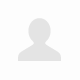
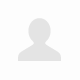
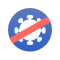
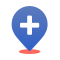
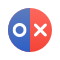
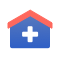

In [9]:
print(soup) #물론 우리가 큰 변화를 느낄 수는 없다

In [5]:
#지역 개수
print(len(soup.select('strong.local_name')))

#누적 수치 개수
print(len(soup.select('p.population_number')))

#몇개를 가져왔는데 수치로 나타내 보았다.

20
20


# 본문 내용 가져오기

##### 각각 크롤링한 데이터들을 우리가 읽을 수 있게 변환해준다.

In [6]:
#지역별 누적 인구수 텍스트화 하기
population_number = []
for i in range(20):
    population_number.append(soup.select('p.population_number')[i].text)
print(population_number)

['5,738', '2,494', '76,245', '11,305', '3,920', '3,920', '6,802', '10,999', '13,192', '5,242', '68,158', '2,479', '4,953', '6,547', '6,547', '5,413', '944', '3,396', '9,615', '3,997']


In [7]:
#지역별 누적 인구수 텍스트화 하기
local_name = []
for i in range(20):
    local_name.append(soup.select('strong.local_name')[i].text)
print(local_name)

['검역자세히', '제주', '서울', '인천', '광주', '광주', '경북', '부산', '대구', '강원', '경기', '전남', '충북', '충남', '충남', '대전', '세종', '전북', '경남', '울산']


In [8]:
# 둘의 데이터를 데이터 프라임에 넣어주기 위해를 zip 함수를 통해 list로 합쳐 주었다.
result=[[i,v] for i,v in zip(local_name,population_number)]
result

[['검역자세히', '5,738'],
 ['제주', '2,494'],
 ['서울', '76,245'],
 ['인천', '11,305'],
 ['광주', '3,920'],
 ['광주', '3,920'],
 ['경북', '6,802'],
 ['부산', '10,999'],
 ['대구', '13,192'],
 ['강원', '5,242'],
 ['경기', '68,158'],
 ['전남', '2,479'],
 ['충북', '4,953'],
 ['충남', '6,547'],
 ['충남', '6,547'],
 ['대전', '5,413'],
 ['세종', '944'],
 ['전북', '3,396'],
 ['경남', '9,615'],
 ['울산', '3,997']]

# 크롤링 결과 저장하기

In [9]:
# 만든결과를 잃어버리지 않게 저장해준다.
results_df = pd.DataFrame(result)
results_df.columns = ['지역','누적 인구']
results_df.to_excel('../미니프로젝트/코로나 지역별 누적인구.xlsx',index=False)